In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 3vs3

Primero separo en escenarios posibles para las tiradas de dados atacantes $Y_1, Y_2, Y_3$ y $D_1, D_2, D_3$. Para eso recorro todas las posibles tiradas de dados en el caso 3v3. Por ejemplo, un escenario posible es $Y_1 = Y_2 = Y_3$ y $Z_1 = Z_2 = Z_3$ (podría ser 4, 4, 4 y 5, 5, 5). Otro escenario es $Y_1 = Y_2 > Y_3$ y $Z_1 = Z_2 = Z_3$ (por ejemplo, 4, 4, 3 y 5, 5, 5) y así voy recorriendo todos los casos, donde cada caso tendrá una probabilidad asociada.

In [2]:
cases_3v3 = {
    "Y1 = Y2 = Y3, Z1 = Z2 = Z3": [],
    "Y1 = Y2 > Y3, Z1 = Z2 = Z3": [],
    "Y1 > Y2 = Y3, Z1 = Z2 = Z3": [],
    "Y1 > Y2 > Y3, Z1 = Z2 = Z3": [],
    "Y1 = Y2 = Y3, Z1 = Z2 > Z3": [],
    "Y1 = Y2 = Y3, Z1 > Z2 = Z3": [],
    "Y1 = Y2 = Y3, Z1 > Z2 > Z3": [],
    "Y1 = Y2 > Y3, Z1 = Z2 > Z3": [],
    "Y1 = Y2 > Y3, Z1 > Z2 = Z3": [],
    "Y1 = Y2 > Y3, Z1 > Z2 > Z3": [],
    "Y1 > Y2 = Y3, Z1 = Z2 > Z3": [],
    "Y1 > Y2 = Y3, Z1 > Z2 = Z3": [],
    "Y1 > Y2 = Y3, Z1 > Z2 > Z3": [],
    "Y1 > Y2 > Y3, Z1 = Z2 > Z3": [],
    "Y1 > Y2 > Y3, Z1 > Z2 = Z3": [],
    "Y1 > Y2 > Y3, Z1 > Z2 > Z3": []
}

for Y1 in range(1, 7):
    for Y2 in range(1, 7):
        for Y3 in range(1, 7):
            for Z1 in range(1, 7):
                for Z2 in range(1, 7):
                    for Z3 in range(1, 7):

                        if (Y1 == Y2 == Y3) and (Z1 == Z2 == Z3):
                            cases_3v3["Y1 = Y2 = Y3, Z1 = Z2 = Z3"].append([Y1, Y2, Y3, Z1, Z2, Z3])
                        elif (Y1 == Y2 > Y3) and (Z1 == Z2 == Z3):
                            cases_3v3["Y1 = Y2 > Y3, Z1 = Z2 = Z3"].append([Y1, Y2, Y3, Z1, Z2, Z3])
                        elif (Y1 > Y2 == Y3) and (Z1 == Z2 == Z3):
                            cases_3v3["Y1 > Y2 = Y3, Z1 = Z2 = Z3"].append([Y1, Y2, Y3, Z1, Z2, Z3])
                        elif (Y1 > Y2 > Y3) and (Z1 == Z2 == Z3):
                            cases_3v3["Y1 > Y2 > Y3, Z1 = Z2 = Z3"].append([Y1, Y2, Y3, Z1, Z2, Z3])
                        elif (Y1 == Y2 == Y3) and (Z1 == Z2 > Z3):
                            cases_3v3["Y1 = Y2 = Y3, Z1 = Z2 > Z3"].append([Y1, Y2, Y3, Z1, Z2, Z3])
                        elif (Y1 == Y2 == Y3) and (Z1 > Z2 == Z3):
                            cases_3v3["Y1 = Y2 = Y3, Z1 > Z2 = Z3"].append([Y1, Y2, Y3, Z1, Z2, Z3])
                        elif (Y1 == Y2 == Y3) and (Z1 > Z2 > Z3):
                            cases_3v3["Y1 = Y2 = Y3, Z1 > Z2 > Z3"].append([Y1, Y2, Y3, Z1, Z2, Z3])
                        elif (Y1 == Y2 > Y3) and (Z1 == Z2 > Z3):
                            cases_3v3["Y1 = Y2 > Y3, Z1 = Z2 > Z3"].append([Y1, Y2, Y3, Z1, Z2, Z3])
                        elif (Y1 == Y2 > Y3) and (Z1 > Z2 == Z3):
                            cases_3v3["Y1 = Y2 > Y3, Z1 > Z2 = Z3"].append([Y1, Y2, Y3, Z1, Z2, Z3])
                        elif (Y1 == Y2 > Y3) and (Z1 > Z2 > Z3):
                            cases_3v3["Y1 = Y2 > Y3, Z1 > Z2 > Z3"].append([Y1, Y2, Y3, Z1, Z2, Z3])
                        elif (Y1 > Y2 == Y3) and (Z1 == Z2 > Z3):
                            cases_3v3["Y1 > Y2 = Y3, Z1 = Z2 > Z3"].append([Y1, Y2, Y3, Z1, Z2, Z3])
                        elif (Y1 > Y2 == Y3) and (Z1 > Z2 == Z3):
                            cases_3v3["Y1 > Y2 = Y3, Z1 > Z2 = Z3"].append([Y1, Y2, Y3, Z1, Z2, Z3])
                        elif (Y1 > Y2 == Y3) and (Z1 > Z2 > Z3):
                            cases_3v3["Y1 > Y2 = Y3, Z1 > Z2 > Z3"].append([Y1, Y2, Y3, Z1, Z2, Z3])
                        elif (Y1 > Y2 > Y3) and (Z1 == Z2 > Z3):
                            cases_3v3["Y1 > Y2 > Y3, Z1 = Z2 > Z3"].append([Y1, Y2, Y3, Z1, Z2, Z3])
                        elif (Y1 > Y2 > Y3) and (Z1 > Z2 == Z3):
                            cases_3v3["Y1 > Y2 > Y3, Z1 > Z2 = Z3"].append([Y1, Y2, Y3, Z1, Z2, Z3])
                        elif (Y1 > Y2 > Y3) and (Z1 > Z2 > Z3):
                            cases_3v3["Y1 > Y2 > Y3, Z1 > Z2 > Z3"].append([Y1, Y2, Y3, Z1, Z2, Z3])

Luego defino una función que, para cada caso calculado antes, cuenta en cuántas tiradas el atacante ganó $k$ ejércitos. Por ejemplo, $G_3$ cuenta todos los escenarios donde el primer, segundo y tercer dado del atacante fue mayor que el primer segundo y tercer dado del defensor (con lo que el atacante gana tres ejércitos). Luego $G_2$ cuenta todos los escenarios donde dos dados atacantes fueron mayores que dos dados defensores y solo un dado atacante fue menor (con lo que el atacante gana dos ejércitos). Así se continúa para $G_1$ y $G_0$ (donde el atacante no ganó ningún ejército porque el primer, segundo y tercer dado del atacante fue menor o igual al primer, segundo y tercer dado del defensor).

In [3]:
def count3v3(rolls):
    rolls = np.asarray(rolls)
    A1, A2, A3, D1, D2, D3 = rolls.T
    G3 = np.sum((A1 > D1) & (A2 > D2) & (A3 > D3))
    G2 = np.sum(
        (A1 <= D1) & (A2 > D2) & (A3 > D3) |
        (A1 > D1) & (A2 <= D2) & (A3 > D3) |
        (A1 > D1) & (A2 > D2) & (A3 <= D3)
    )
    G1 = np.sum(
        (A1 <= D1) & (A2 <= D2) & (A3 > D3) |
        (A1 <= D1) & (A2 > D2) & (A3 <= D3) |
        (A1 > D1) & (A2 <= D2) & (A3 <= D3)
    )
    G0 = np.sum((A1 <= D1) & (A2 <= D2) & (A3 <= D3))
    return np.array([G3, G2, G1, G0])

Después necesito calcular la probabilidad de cada caso. Por ejemplo, que todos los dados atacantes sean iguales entre sí ocurre con una probabilidad de $\frac{1}{6^3}$. Que además los dados defensores sean todos iguales entre sí también ocurre con una probabilidad $\frac{1}{6^3}$. Entonces la probabilidad de estos sucesos en conjunto es $(\frac{1}{6^3})^2$, porque son eventos independientes. De esta manera, puedo asociarle una probabilidad a todos los casos en los que separé antes.

In [4]:
cases_prob_3v3 = {
    "Y1 = Y2 = Y3, Z1 = Z2 = Z3": 1/6**3 * 1/6**3,
    "Y1 = Y2 > Y3, Z1 = Z2 = Z3": 3/6**3 * 1/6**3,
    "Y1 > Y2 = Y3, Z1 = Z2 = Z3": 3/6**3 * 1/6**3,
    "Y1 > Y2 > Y3, Z1 = Z2 = Z3": 6/6**3 * 1/6**3,
    "Y1 = Y2 = Y3, Z1 = Z2 > Z3": 1/6**3 * 3/6**3,
    "Y1 = Y2 = Y3, Z1 > Z2 = Z3": 1/6**3 * 3/6**3,
    "Y1 = Y2 = Y3, Z1 > Z2 > Z3": 1/6**3 * 6/6**3,
    "Y1 = Y2 > Y3, Z1 = Z2 > Z3": 3/6**3 * 3/6**3,
    "Y1 = Y2 > Y3, Z1 > Z2 = Z3": 3/6**3 * 3/6**3,
    "Y1 = Y2 > Y3, Z1 > Z2 > Z3": 3/6**3 * 6/6**3,
    "Y1 > Y2 = Y3, Z1 = Z2 > Z3": 3/6**3 * 3/6**3,
    "Y1 > Y2 = Y3, Z1 > Z2 = Z3": 3/6**3 * 3/6**3,
    "Y1 > Y2 = Y3, Z1 > Z2 > Z3": 3/6**3 * 6/6**3,
    "Y1 > Y2 > Y3, Z1 = Z2 > Z3": 6/6**3 * 3/6**3,
    "Y1 > Y2 > Y3, Z1 > Z2 = Z3": 6/6**3 * 3/6**3,
    "Y1 > Y2 > Y3, Z1 > Z2 > Z3": 6/6**3 * 6/6**3
}

Ahora que tengo una forma de contar en cuántos escenarios de una cierta tirada de dados el atacante gana $k$ ejércitos, y además tengo la probabilidad de obtener esa tirada de dados, solo basta multiplicar estos valores entre sí. Esto lo hago para todos los casos en los que separé antes y sumo todos los resultados.

In [5]:
p3v3 = 0
for case, values in cases_3v3.items():
    p3v3 += count3v3(values) * cases_prob_3v3[case]
p3v3

array([0.13760288, 0.21469907, 0.26466049, 0.38303755])

# 2vs3

El caso 2v3 es idéntico al anterior, solo cambia que ahora tengo menos casos. De la misma forma que antes, voy a agregar todas las tiradas donde obtuve un cierto caso.

In [6]:
cases_2v3 = {
    "Y1 = Y2, Z1 = Z2 = Z3": [],
    "Y1 > Y2, Z1 = Z2 = Z3": [],
    "Y1 = Y2, Z1 = Z2 > Z3": [],
    "Y1 = Y2, Z1 > Z2 = Z3": [],
    "Y1 = Y2, Z1 > Z2 > Z3": [],
    "Y1 > Y2, Z1 = Z2 > Z3": [],
    "Y1 > Y2, Z1 > Z2 = Z3": [],
    "Y1 > Y2, Z1 > Z2 > Z3": []
}

for Y1 in range(1, 7):
    for Y2 in range(1, 7):
        for Z1 in range(1, 7):
            for Z2 in range(1, 7):
                for Z3 in range(1, 7):
                    if (Y1 == Y2) and (Z1 == Z2 == Z3):
                        cases_2v3["Y1 = Y2, Z1 = Z2 = Z3"].append([Y1, Y2, Z1, Z2, Z3])
                    elif (Y1 > Y2) and (Z1 == Z2 == Z3):
                        cases_2v3["Y1 > Y2, Z1 = Z2 = Z3"].append([Y1, Y2, Z1, Z2, Z3])
                    elif (Y1 == Y2) and (Z1 == Z2 > Z3):
                        cases_2v3["Y1 = Y2, Z1 = Z2 > Z3"].append([Y1, Y2, Z1, Z2, Z3])
                    elif (Y1 == Y2) and (Z1 > Z2 == Z3):
                        cases_2v3["Y1 = Y2, Z1 > Z2 = Z3"].append([Y1, Y2, Z1, Z2, Z3])
                    elif (Y1 == Y2) and (Z1 > Z2 > Z3):
                        cases_2v3["Y1 = Y2, Z1 > Z2 > Z3"].append([Y1, Y2, Z1, Z2, Z3])
                    elif (Y1 > Y2) and (Z1 == Z2 > Z3):
                        cases_2v3["Y1 > Y2, Z1 = Z2 > Z3"].append([Y1, Y2, Z1, Z2, Z3])
                    elif (Y1 > Y2) and (Z1 > Z2 == Z3):
                        cases_2v3["Y1 > Y2, Z1 > Z2 = Z3"].append([Y1, Y2, Z1, Z2, Z3])
                    elif (Y1 > Y2) and (Z1 > Z2 > Z3):
                        cases_2v3["Y1 > Y2, Z1 > Z2 > Z3"].append([Y1, Y2, Z1, Z2, Z3])

Nuevamente, para una dado caso (por ej $Y_1 > Y_2$ y $Z_1 > Z_2 > Z_2$), calculo la cantidad de escenarios donde el atacante gana una cierta cantidad de ejércitos $G_k$.

In [7]:
def count2v2(rolls):
    rolls = np.asarray(rolls)
    A1, A2, D1, D2, D3 = rolls.T
    G2 = np.sum((A1 > D1) & (A2 > D2))
    G1 = np.sum(
        (A1 <= D1) & (A2 > D2) |
        (A1 > D1) & (A2 <= D2)
    )
    G0 = np.sum((A1 <= D1) & (A2 <= D2))
    return np.array([G2, G1, G0])

Al igual que antes, le asocio una probabilidad a cada caso.

In [8]:
cases_prob_2v3 = {
    "Y1 = Y2, Z1 = Z2 = Z3": 1/6**2 * 1/6**3,
    "Y1 > Y2, Z1 = Z2 = Z3": 2/6**2 * 1/6**3,
    "Y1 = Y2, Z1 = Z2 > Z3": 1/6**2 * 3/6**3,
    "Y1 = Y2, Z1 > Z2 = Z3": 1/6**2 * 3/6**3,
    "Y1 = Y2, Z1 > Z2 > Z3": 1/6**2 * 6/6**3,
    "Y1 > Y2, Z1 = Z2 > Z3": 2/6**2 * 3/6**3,
    "Y1 > Y2, Z1 > Z2 = Z3": 2/6**2 * 3/6**3,
    "Y1 > Y2, Z1 > Z2 > Z3": 2/6**2 * 6/6**3
}

Por último, multiplico la cantidad de escenarios donde el atacante gana $k$ ejércitos en un dado caso por la probabilidad de que ocurra ese caso.

In [9]:
p2v3 = 0
for case, values in cases_2v3.items():
    p2v3 += count2v2(values) * cases_prob_2v3[case]
p2v3

array([0.12590021, 0.25475823, 0.61934156])

# Markov

In [10]:
def getProbability(dices_attacker, dices_defender, armies_won):
    probabilities = {
        (1, 1, 1): 15/36,        # π111
        (1, 1, 0): 21/36,        # π110
        (1, 2, 1): 55/216,       # π121
        (1, 2, 0): 161/216,      # π120
        (1, 3, 1): 25/144,       # π131 Mio
        (1, 3, 0): 119/144,      # π130 Mio

        (2, 1, 1): 125/216,      # π211
        (2, 1, 0): 91/216,       # π210
        (2, 2, 2): 295/1296,     # π222
        (2, 2, 1): 420/1296,     # π221
        (2, 2, 0): 581/1296,     # π220
        (2, 3, 2): 0.12590021,   # π232
        (2, 3, 1): 0.25475823,   # π231
        (2, 3, 0): 0.61934156,   # π230

        (3, 1, 1): 855/1296,     # π311
        (3, 1, 0): 441/1296,     # π310
        (3, 2, 2): 2890/7776,    # π322
        (3, 2, 1): 2611/7776,    # π321
        (3, 2, 0): 2275/7776,    # π320
        (3, 3, 3): 0.13760288,   # π333
        (3, 3, 2): 0.21469907,   # π332
        (3, 3, 1): 0.26466049,   # π331
        (3, 3, 0): 0.38303755,   # π330
    }
    return probabilities[(dices_attacker, dices_defender, armies_won)]

def getMatrixEntries(prev_state, post_state, max_dice_defender):
    attacker_armies_prev, defender_armies_prev = prev_state
    attacker_armies_post, defender_armies_post = post_state
    armies_won = defender_armies_prev - defender_armies_post
    armies_lost = attacker_armies_prev - attacker_armies_post
    attacker_dices = min(attacker_armies_prev, 3)
    defender_dices = min(defender_armies_prev, max_dice_defender) # The defender defends with three dices when playing TEG and with two dices when playing RISK
    if armies_won < 0  or armies_lost < 0 or (armies_lost + armies_won) != min(attacker_dices, defender_dices) or (armies_lost + armies_won > 3):
        return 0
    else:
        return getProbability(attacker_dices, defender_dices, armies_won)

In [11]:
class TEG:
    def __init__(self, max_armies_attacker, max_armies_defender, max_dice_defender=3):
        self.max_armies_attacker = max_armies_attacker
        self.max_armies_defender = max_armies_defender
        self.max_dice_defender = max_dice_defender

        self.transient_states, self.absorbing_states = self.getStates()
        self.Q, self.R = self.getMatrixQ(), self.getMatrixR()
        self.S = self.getMatrixS()


    def getStates(self):
        transient_states = []
        absorbing_states = []
        for i in range(1, self.max_armies_attacker+1):
            for j in range(1, self.max_armies_defender+1):
                transient_states.append((i, j))
        for i in range(1, self.max_armies_attacker+1):
            absorbing_states.append((i, 0))
        for j in range(1, self.max_armies_defender+1):
            absorbing_states.append((0, j)) 
        return transient_states, absorbing_states
    
    def getMatrixQ(self):
        Q = np.zeros((self.max_armies_attacker * self.max_armies_defender, self.max_armies_attacker * self.max_armies_defender))
        for i, transient_state_1 in enumerate(self.transient_states):
            for j, transient_state_2 in enumerate(self.transient_states):
                Q[i, j] = getMatrixEntries(transient_state_1, transient_state_2, self.max_dice_defender)
        return Q
    
    def getMatrixR(self):
        R = np.zeros((self.max_armies_attacker * self.max_armies_defender, self.max_armies_attacker + self.max_armies_defender))
        for i, transient_state in enumerate(self.transient_states):
            for j, absorbing_state in enumerate(self.absorbing_states):
                R[i, j] = getMatrixEntries(transient_state, absorbing_state, self.max_dice_defender)
        return R
    
    def getMatrixS(self):
        I = np.identity(self.Q.shape[0])
        return np.matmul(np.linalg.inv(I - self.Q), self.R)
    
    def getWinningProbability(self, armies_attacker, armies_defender):
        i = self.transient_states.index((armies_attacker, armies_defender))
        return self.S[i][:armies_attacker].sum()
    
    def getMatrixP(self):
        P = np.zeros((self.max_armies_attacker, self.max_armies_defender))
        for armies_attacker in range(self.max_armies_attacker):
            for armies_defender in range(self.max_armies_defender):
                P[armies_attacker, armies_defender] = self.getWinningProbability(armies_attacker+1, armies_defender+1)
        return P
    
    def getExpectedLoss(self):
        armies_lost = self.max_armies_attacker - np.arange(1, self.max_armies_attacker+1)
        armies_lost = np.concatenate((armies_lost, self.max_armies_attacker * np.ones(self.max_armies_defender)))
        wining_probability = self.S[-1]
        return (armies_lost * wining_probability).sum()

# Plot

In [12]:
params = {
    'figure.figsize': (11, 6),
    'font.size': 18,
    'axes.grid': True,
    'grid.linestyle': ':',
    'grid.linewidth': 0.5,
    'axes.axisbelow': True,
    'legend.fontsize': 20,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20
}

plt.rcParams.update(params)

In [13]:
max_armies_attacker = 30
max_armies_defender = 30

teg = TEG(max_armies_attacker, max_armies_defender)
risk = TEG(max_armies_attacker, max_armies_defender, 2)

P_teg = teg.getMatrixP() * 100
P_risk = risk.getMatrixP() * 100

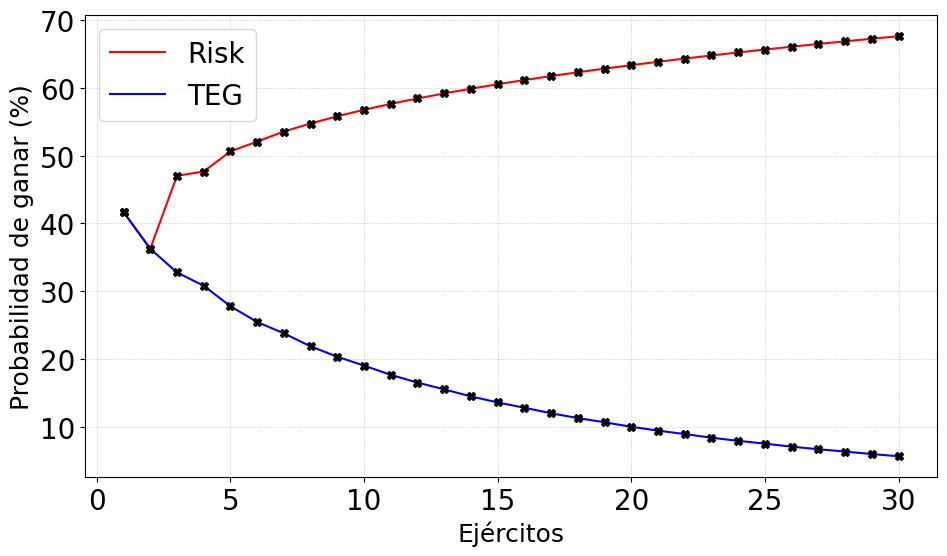

In [14]:
equal_armies_curve = np.diag(P_risk)
armies_defender = np.arange(1, max_armies_defender + 1)

plt.plot(armies_defender, np.diag(P_risk), color='red', label='Risk')
plt.plot(armies_defender, np.diag(P_risk), 'X', color='black')

plt.plot(armies_defender, np.diag(P_teg), color='blue', label='TEG')
plt.plot(armies_defender, np.diag(P_teg), 'X', color='black')

# for i in armies_defender:
#     i = i-1
#     if i % 10 == 0:
#         plt.plot(armies_defender, P_teg[i, :], 'd', color='blue')
#         plt.plot(armies_defender, P_teg[i, :], color='blue')
#         plt.plot(armies_defender, P_risk[i, :], 'd', color='red')
#         plt.plot(armies_defender, P_risk[i, :], color='red')

plt.xlabel('Ejércitos')
plt.ylabel('Probabilidad de ganar (%)')
plt.legend()
plt.show()

In [15]:
def plotHeatMap(P, round_digits=5):
    P_rounded = np.round(P, round_digits)
    plt.figure(figsize=(17, 8))
    sns.heatmap(P_rounded, annot=True, fmt=f'.{round_digits}f', cmap='Blues', cbar=False)
    plt.yticks(ticks=np.arange(1, len(P_rounded)+1) - 0.5, labels=np.arange(1, len(P_rounded)+1))
    plt.xticks(ticks=np.arange(1, len(P_rounded)+1) - 0.5, labels=np.arange(1, len(P_rounded)+1))
    plt.xlabel('Ejércitos defensores')
    plt.ylabel('Ejércitos atacantes')
    plt.tick_params(axis='x', labeltop=True, labelbottom=False, top=True, bottom=False)


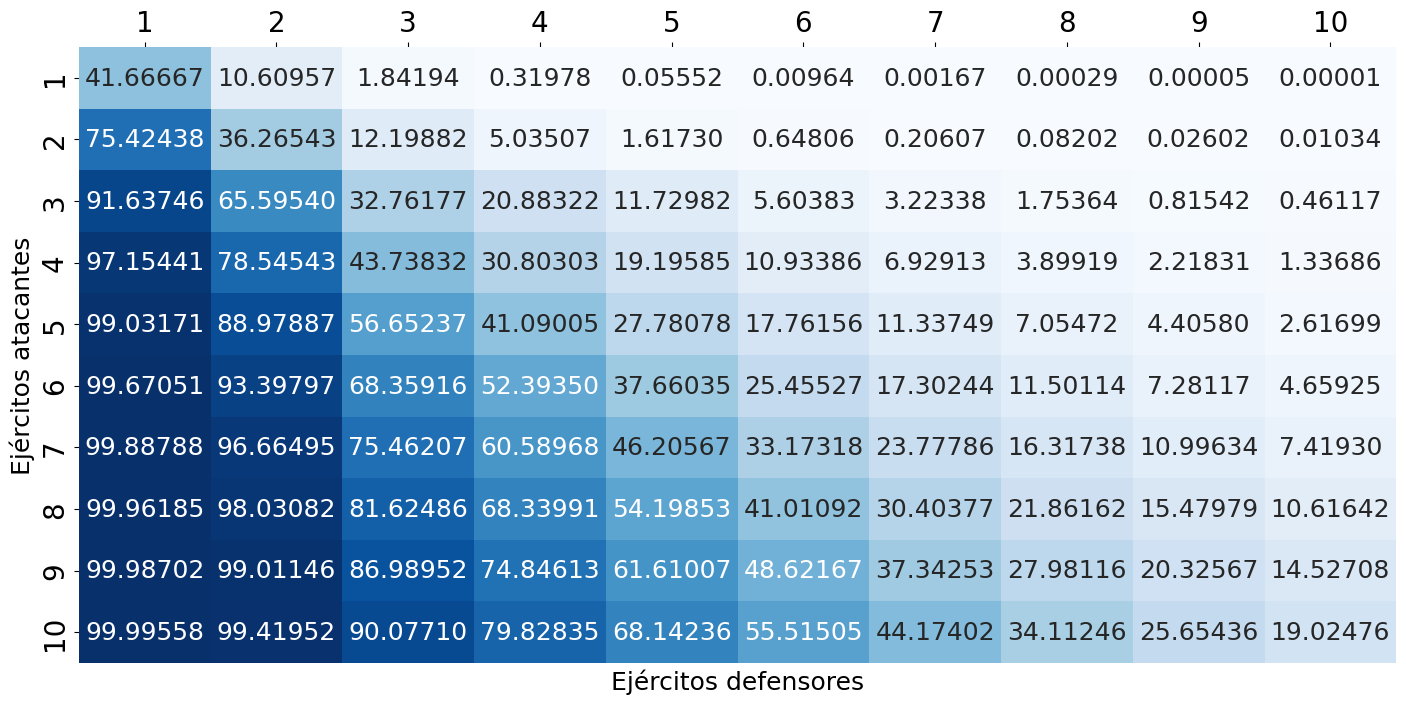

In [16]:
plotHeatMap(P_teg[:10,:10], 5)

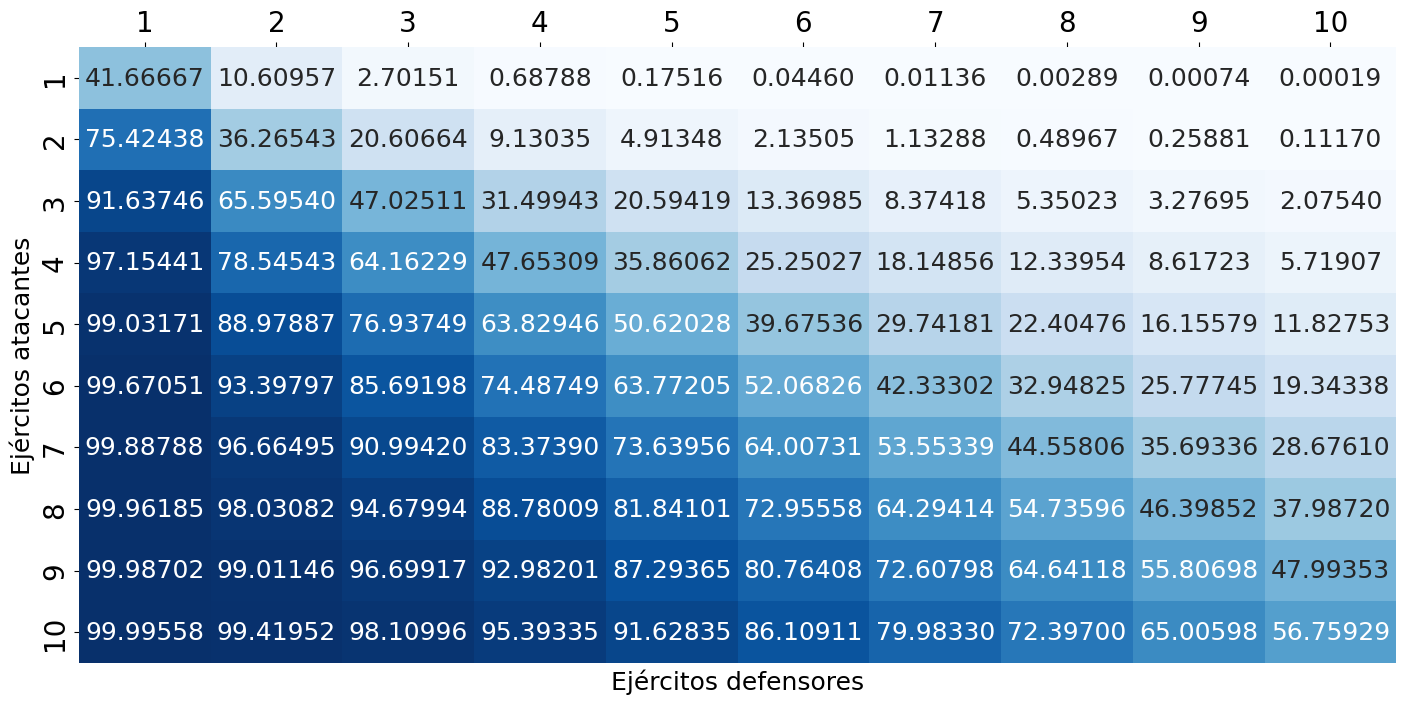

In [17]:
plotHeatMap(P_risk[:10,:10], 5)